In [ ]:
import subprocess 
from subprocess import PIPE
from osgeo import gdal
import json
import glob 
import pandas as pd
import os
import numpy as np
import cv2

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def check_empty_img(url):
    # Reading Image
    # You can give path to the 
    # image as first argument
#     print(url)
    image = cv2.imread(url+'/B01.tif',0)
  
    # Checking if the image is empty or not
    if (cv2.countNonZero(image) == 0):
        return  True
    else:
        return  False

In [ ]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 68.4 MB/s eta 0:00:00


In [ ]:
def remove_empty_folders(path):
    subprocess.run(['rm', '-r', path])
    return

In [ ]:
import rasterio

In [ ]:
def product_name(path):
    # print(path)
    json_data=open(path+"/stac.json", "rb")
    jdata = json.load(json_data)
    
    return  jdata['id']

# **Iterate through folders**

In [ ]:
flist = []
rootdir = '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist.append(d)
        
        
print(f"The number of folders are currently = {len(flist)}")

The number of folders are currently = 1949


In [ ]:
def generate_NDWI_tif(path, product_id):

    blue_path = path + "/" + "B03.tif"
    NIR_path = path + "/" + "B08.tif"
    print(path)
    
    try:

      with rasterio.open(blue_path) as band_blue, rasterio.open(NIR_path) as band_nir:
        blue = band_blue.read(1)
        nir = band_nir.read(1)

        ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))

        profile = band_blue.profile
        profile.update(dtype=rasterio.float32, count=1)

        with rasterio.open(path + "/" + "ndwi.tif", 'w', **profile) as dst:
          dst.write(ndwi.astype(rasterio.float32), 1)
    except:
      print("Folder with no Data: ", path)
      remove_empty_folders(path)

In [ ]:
#/content/drive/MyDrive/SEN_Data/sen12floods_s2_labels/sen12floods_s2_labels/sen12floods_s2_labels_0021_2019_01_19

def image_label(product_id):
    
    rootdir = "/content/drive/MyDrive/SEN_Data/sen12floods_s2_labels/sen12floods_s2_labels"
    pd = product_id.split("_")
    pd = pd[3] + "_" + pd[4] + "_" + pd[5] + "_" + pd[6]

    # print(rootdir)
    # print(pd)
    # print(rootdir+pd)
    
    json_data=open(rootdir + "/sen12floods_s2_labels_" +pd +"/stac.json", "rb")
    jdata = json.load(json_data)
    flood = jdata["properties"]["FLOODING"]
    

    if (flood == "False"):
        image_label = 0
    else:
        image_label = 1
    
    return image_label

In [ ]:
for folder_path in flist:
    empty = check_empty_img(folder_path) #check if the first the folder contains empty images
    if empty:
        print("The images inside the current folder are empty - zero")
        remove_empty_folders(folder_path)
    else:
        product_id = product_name(folder_path)
        generate_NDWI_tif(folder_path, product_id)

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0233_2019_03_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0233_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0233_2019_03_19
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0233_2019_04_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0233_2019_04_08
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0233_2019_03_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0233_2019_04_21
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0234_2019_03_27
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0246_2019_03_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0246_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0247_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0246_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0246_2019_03_27
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0246_2019_03_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0246_2019_04_08
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0246_2019_04_21
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0255_2019_03_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0255_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0255_2019_03_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0255_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0255_2019_03_07
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0254_2019_03_19
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0255_2019_02_25
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_sou

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0259_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0259_2019_03_07
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0260_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0260_2019_03_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0260_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0261_2019_03_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0260_2019_03_07
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0260_2019_03_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_03_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_03_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_02_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0261_2019_03_19
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_03_07
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0261_2019_03_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_03_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0263_2019_03_07
/content/drive/MyDrive/SEN_Data/se

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0263_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0263_2019_02_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0263_2019_03_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0263_2019_03_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0262_2019_03_19
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0266_2019_03_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0313_2019_01_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0318_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0316_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0316_2019_03_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0316_2019_02_13
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0313_2019_03_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0318_2019_03_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0318_2019_02_13
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_15_2019_04_24
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_16_2019_02_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_16_2019_03_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_16_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_15_2019_04_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_16_2019_03_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_15_2019_04_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_18_2019_03_10
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_sou

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_18_2019_02_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_17_2018_12_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_16_2019_04_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_18_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_17_2019_02_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_19_2019_03_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_19_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_18_2019_03_30
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_19_201

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_20_2019_02_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_20_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_21_2019_02_13
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_20_2019_03_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_20_2019_04_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_20_2019_04_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_20_2019_04_24
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_20_2019_04_19
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_21_201

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_37_2019_01_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_37_2019_01_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_38_2019_01_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_38_2018_12_30
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_38_2019_01_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_37_2019_02_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_38_2018_12_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_37_2019_02_11
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_37_201

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_6_2019_01_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_67_2019_04_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_67_2019_04_06
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_67_2019_04_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_6_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_67_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_6_2019_02_13
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_6_2019_03_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_03_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_7_2019_01_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_7_2019_01_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_02_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_7_2018_12_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_7_2019_02_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_7_2019_01_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_7_2019_01_27
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen1

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_03_09
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_9_2018_12_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_9_2018_12_27
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_03_19
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_9_2018_12_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_03_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_03_07
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_8_2019_03_04
/

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0115_2019_02_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0115_2018_12_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0111_2019_02_11
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0116_2018_12_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0115_2018_12_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0116_2018_12_27
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0116_2018_12_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0115_2019_01_24
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0127_2019_01_13


<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0127_2019_01_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0128_2018_12_26
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0127_2019_01_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0128_2019_01_05
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0127_2019_01_05
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0128_2018_12_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0127_2019_01_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0127_2019_01_18


<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2018_12_26
The images inside the current folder are empty - zero
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2019_01_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2018_12_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2019_01_05
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0128_2019_01_10
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0128_2019_01_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2018_12_19


<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0131_2018_12_26
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0131_2019_01_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2019_01_18


<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0131_2019_01_05
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0131_2018_12_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2019_01_23
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2019_01_13


<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0130_2019_01_15
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0132_2019_01_15
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0132_2018_12_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0132_2018_12_26
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0132_2019_01_10
The images inside the current folder are empty - zero
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0131_2019_01_15
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_01

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0141_2019_04_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0141_2019_03_12
The images inside the current folder are empty - zero
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0143_2019_02_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0143_2019_04_01


<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0144_2019_01_26
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0144_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0144_2019_04_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0144_2019_02_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0143_2019_04_21
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0143_2019_04_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0144_2019_01_31
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0143_2019_04_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0148_2019_01_31
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0148_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0148_2019_04_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0149_2019_01_26
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0148_2019_04_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0148_2019_02_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0148_2019_04_21
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0148_2019_04_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0156_2019_01_26
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0156_2019_01_31
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_02_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_03_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_01_26
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0156_2019_04_06


<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0156_2019_04_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_04_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_02_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_04_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0156_2019_04_21
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_01_31
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0157_2019_04_21
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0158_2019_04_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0171_2019_02_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0173_2019_02_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0174_2019_03_29
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0176_2019_02_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0174_2019_02_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0176_2019_04_18
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0174_2019_02_27
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0176_2019_03_29
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0186_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0184_2019_03_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0186_2019_04_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0186_2019_02_13
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0186_2019_04_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0184_2019_04_27
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0186_2019_04_19
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0187_2019_04_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0193_2019_04_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0194_2019_02_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0193_2019_04_24
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0193_2019_03_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0194_2019_04_04
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0196_2019_02_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0196_2019_03_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_sou

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0194_2019_04_24
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0196_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0196_2019_03_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0194_2019_03_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0196_2019_04_24
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0198_2019_03_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0198_2019_02_23
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0198_2019_02_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0196_2019_04_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0198_2019_03_10
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0198_2019_04_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0199_2019_03_25
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0199_2019_02_28
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0198_2019_04_24
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0198_2019_04_14
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0199_2019_04_04
/content/drive/MyDrive/SEN_Data/se

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0001_2018_12_18
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0004_2018_12_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0001_2019_02_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0001_2019_02_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_27
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0004_2018_12_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0001_2019_01_12
/content/drive/MyDrive/SEN_Data/se

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


The images inside the current folder are empty - zero
The images inside the current folder are empty - zero
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0005_2019_01_06
The images inside the current folder are empty - zero
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0005_2019_01_16
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0006_2019_01_16
The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0007_2018_12_30
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0006_2019_01_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0007_201

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


The images inside the current folder are empty - zero
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0057_2019_02_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0055_2018_12_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0054_2019_02_01
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0057_2018_12_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0054_2018_12_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0059_2019_01_12
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0059_2018_12_28
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0061_2019_02_04
/content/drive/MyDrive/SEN_Data/se

<ipython-input-9-09260f81c6ab>:13: RuntimeWarning: invalid value encountered in true_divide
  ndwi = np.where((blue + nir) == 0., 0, (blue - nir) / (blue + nir))


/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0059_2019_01_02
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0059_2019_01_27
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0060_2019_02_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0059_2019_01_22
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0059_2019_01_17
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0059_2019_02_06
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0068_2019_02_04
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0072_2019_02_04
The images inside the current folder are empty - zero


In [ ]:
flist = []
rootdir = '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist.append(d)
        
        
print(f"The number of folders are currently = {len(flist)}")

The number of folders are currently = 1949


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0234_2019_03_22


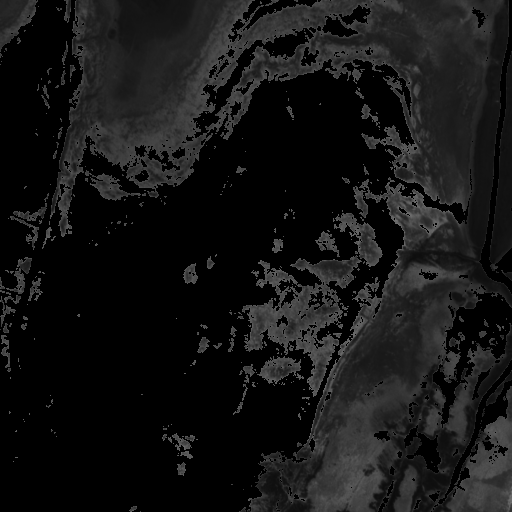

(512, 512)
Label:  0
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0235_2019_03_12


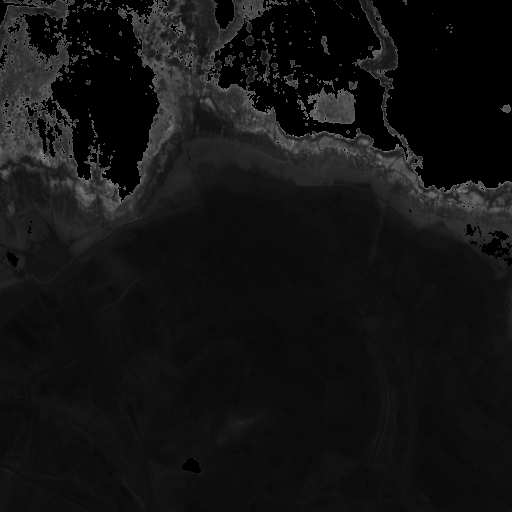

(512, 512)
Label:  0
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0234_2019_04_21


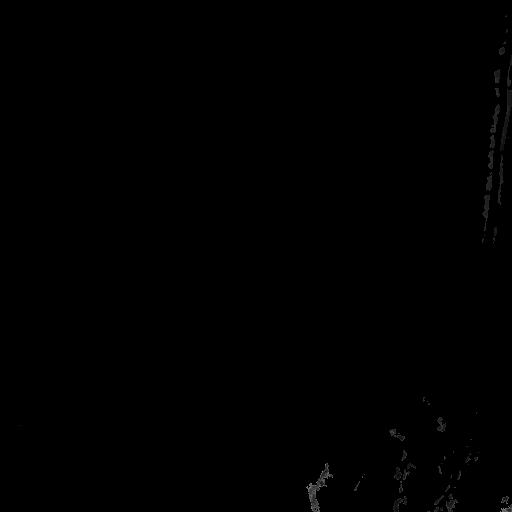

(512, 512)
Label:  0
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0235_2019_03_09


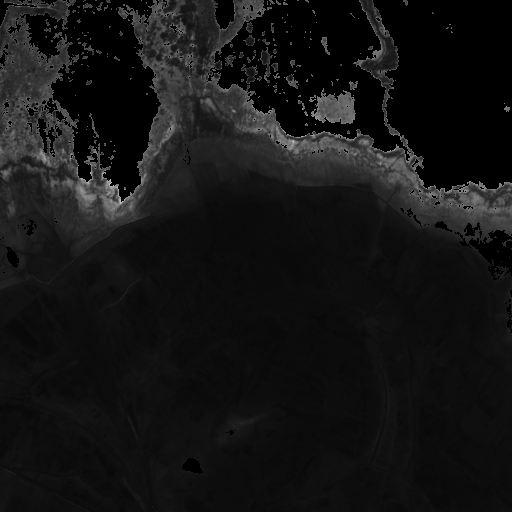

(512, 512)
Label:  0
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0234_2019_03_19


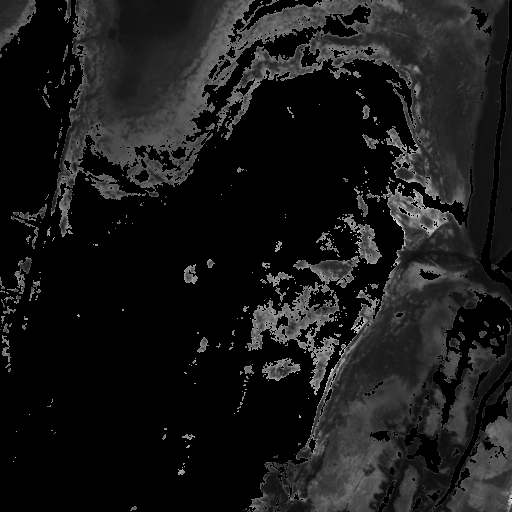

(512, 512)
Label:  0


In [ ]:
for folder_path in flist[90:95]:
  print("===============================================================")
  print(folder_path)
  prod_id = product_name(folder_path)
  label = image_label(prod_id)
  img_path = folder_path + "/ndwi_img.jpg"
  ndwi_path = folder_path + "/ndwi.tif"
  
  with rasterio.open(ndwi_path) as ndwi_file:

    # Read the NDWI band as an array
    ndwi = ndwi_file.read(1)

    img_reduced = Image.fromarray(ndwi)
    img_reduced.show()
    # img_reduced.save(img_path)

    print(ndwi.shape)
    print("Label: ", label)


# **Autoencoder**

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Input

In [ ]:
model = Sequential(
    [
        #Encoder
        Input(shape=(512, 512, 1)),
        Conv2D(32, 3, activation="relu", padding="same"),
        MaxPooling2D(2, padding="same"),
        Conv2D(16, 3, activation="relu", padding="same"),
        MaxPooling2D(2, padding="same"),
        #Decoder
        Conv2D(16, 3, activation="relu", padding="same"),
        UpSampling2D(2),
        Conv2D(32, 3, activation="relu", padding="same"),
        UpSampling2D(2),
        #Output (512, 512, 1) ---> issue: (512, 512, 4, 1)
        Conv2D(1, 3, activation="sigmoid", padding="same")
    ]
)

model.compile(optimizer="adam", loss="binary_crossentropy")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 16)      4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 up_sampling2d (UpSampling2D  (None, 256, 256, 16)     0

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0226_2019_04_08


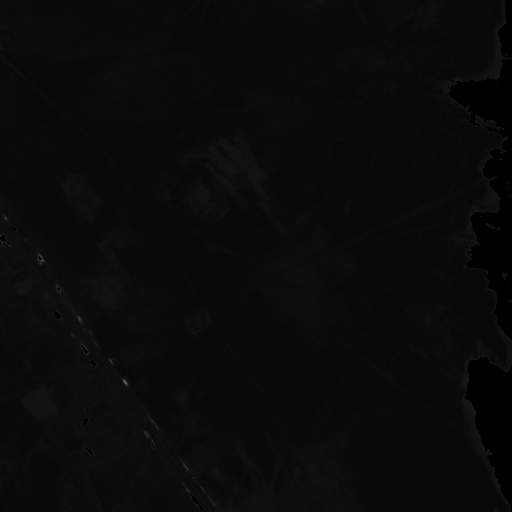

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0226_2019_04_08/uncompressed_ndwi.jpg
X:  (512, 512, 1)
16/16 [==============================] - 0s 3ms/step
compressed shape:  (512, 512, 4, 1)
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0226_2019_03_27


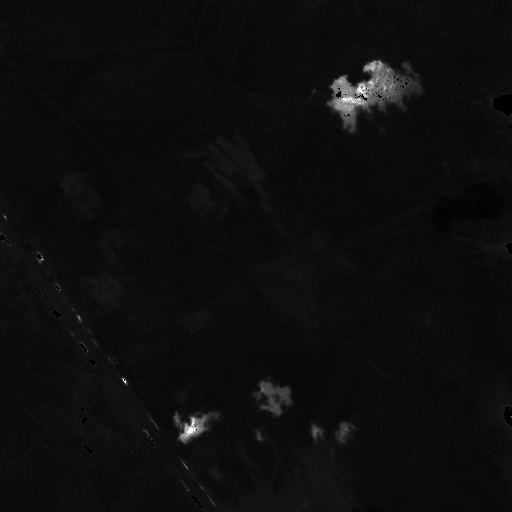

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0226_2019_03_27/uncompressed_ndwi.jpg
X:  (512, 512, 1)
16/16 [==============================] - 0s 3ms/step
compressed shape:  (512, 512, 4, 1)
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0227_2019_03_17


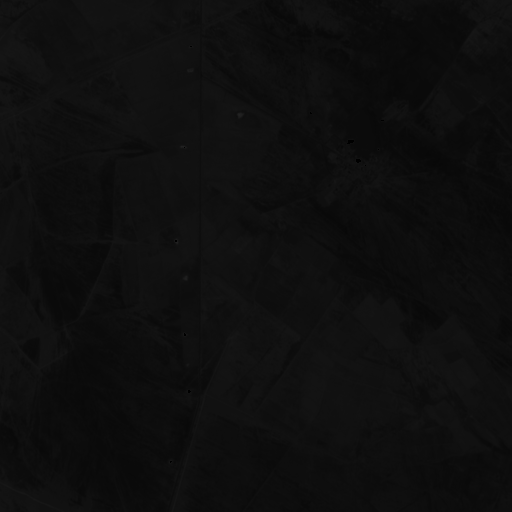

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0227_2019_03_17/uncompressed_ndwi.jpg
X:  (512, 512, 1)
16/16 [==============================] - 0s 3ms/step
compressed shape:  (512, 512, 4, 1)
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0229_2019_03_27


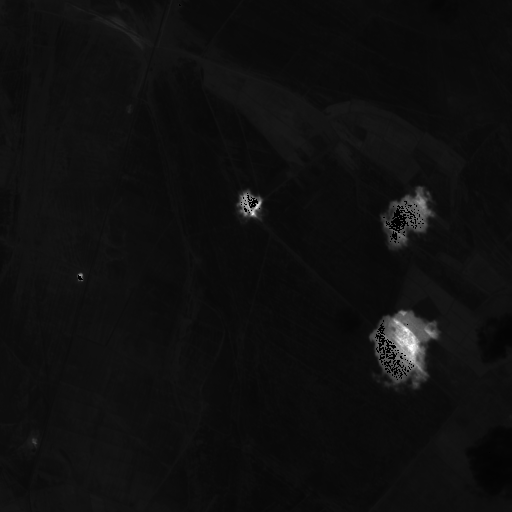

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0229_2019_03_27/uncompressed_ndwi.jpg
X:  (512, 512, 1)
16/16 [==============================] - 0s 3ms/step
compressed shape:  (512, 512, 4, 1)
/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0229_2019_03_19


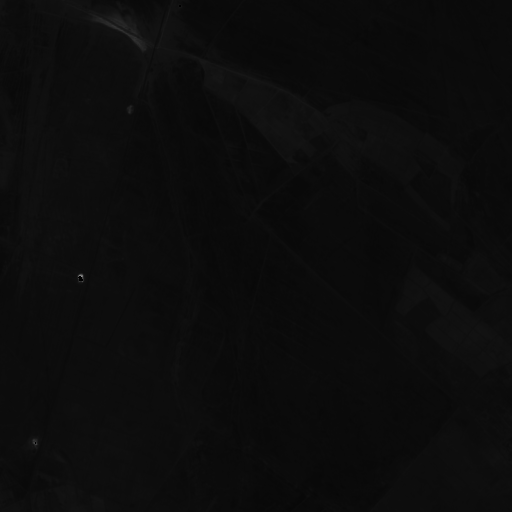

/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0229_2019_03_19/uncompressed_ndwi.jpg
X:  (512, 512, 1)
16/16 [==============================] - 0s 3ms/step
compressed shape:  (512, 512, 4, 1)


In [ ]:
for folder_path in flist[40:45]:
  print("===============================================================")
  print(folder_path)
  prod_id = product_name(folder_path)
  label = image_label(prod_id)
  ndwi_path = folder_path + "/ndwi.tif"
  img_store_path = folder_path + "/uncompressed_ndwi.jpg"
  
  with rasterio.open(ndwi_path) as ndwi_file:

    # Read the NDWI band as an array
    ndwi = ndwi_file.read(1)

    X = np.expand_dims(ndwi, axis=-1)

    original_img = Image.fromarray(ndwi)
    # original_img.save(img_store_path)
    original_img.show()

    print(img_store_path)
    print("X: ", X.shape)

    model.fit(X, X, epochs=1, batch_size=32)
    compressed_img = model.predict(X)

    # compressed_img = np.squeeze(compressed_img, axis=-1)
    # compressed_img = np.squeeze(compressed_img, axis=-1)

    print("compressed shape: ", compressed_img.shape)
    # compressed_img = np.reshape(compressed_img, (512, 512))
    # compressed_img = Image.fromarray(compressed_img.astype('uint8'), mode='L')
    # compressed_img.show()


# **Classification**

In [ ]:
def load_data(folder_list):
    
    data = [] 
    images = []
    labels = []
    
    for folder in folder_list:
        # try:
      # print(folder)
      product_id = product_name(folder)
      print(f"Processing {product_id} image product")
      label = image_label(product_id)
  
      # Open the img
      image = cv2.imread(folder + "/ndwi.tif", cv2.IMREAD_ANYDEPTH)

      # print(type(image))

      # plt.imshow(image)
      # plt.show()
      # Append the image and its corresponding label to the output
      images.append(image)
      labels.append(label)
        # except:
        #     print("exception")
        #     pass
        
        
    images = np.array(images)
    labels = np.array(labels)
        
        
    data.append([images, labels])     

    return images, labels

In [ ]:
flist = []
rootdir = '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist.append(d)
        
        
print(f"The number of folders are currently = {len(flist)}")

The number of folders are currently = 1949


In [ ]:
flist

['/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0220_2019_04_04',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0220_2019_02_23',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0220_2019_04_24',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0220_2019_03_25',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0220_2019_02_13',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0221_2019_02_23',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0222_2019_02_13',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source/sen12floods_s2_source_0221_2019_04_04',
 '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/

In [ ]:
images, labels = load_data(flist)

Processing sen12floods_s2_source_64_2019_02_25 image product
Processing sen12floods_s2_source_0059_2019_01_02 image product
Processing sen12floods_s2_source_0208_2019_04_04 image product
Processing sen12floods_s2_source_0223_2019_03_12 image product
Processing sen12floods_s2_source_45_2019_01_29 image product
Processing sen12floods_s2_source_64_2019_03_12 image product
Processing sen12floods_s2_source_64_2019_03_07 image product
Processing sen12floods_s2_source_0240_2019_03_12 image product
Processing sen12floods_s2_source_0200_2019_03_10 image product
Processing sen12floods_s2_source_0137_2019_03_10 image product
Processing sen12floods_s2_source_0285_2019_03_12 image product
Processing sen12floods_s2_source_0259_2019_03_22 image product
Processing sen12floods_s2_source_45_2018_12_30 image product
Processing sen12floods_s2_source_0076_2018_12_31 image product
Processing sen12floods_s2_source_0278_2019_03_02 image product
Processing sen12floods_s2_source_0192_2019_04_04 image product
Pr

In [ ]:
images

array([[[2.89282829e-01, 3.02866638e-01, 3.14161211e-01, ...,
         1.26113071e+01, 1.26703472e+01, 1.27581892e+01],
        [2.98960507e-01, 3.11275572e-01, 3.26047361e-01, ...,
         1.30544271e+01, 1.32766314e+01, 1.30933361e+01],
        [2.86080271e-01, 3.01270425e-01, 3.15887839e-01, ...,
         1.28289366e+01, 1.30471354e+01, 1.29705353e+01],
        ...,
        [1.33733444e+01, 1.44599419e+01, 1.56130123e+01, ...,
         1.21921034e+01, 1.09986315e+01, 1.06755857e+01],
        [1.27607737e+01, 1.26937723e+01, 1.40386791e+01, ...,
         1.25596800e+01, 1.12600775e+01, 1.06871881e+01],
        [1.09533806e+01, 1.21045122e+01, 1.30407495e+01, ...,
         1.26953173e+01, 1.20175829e+01, 1.17311907e+01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
images.shape

(1949, 512, 512)

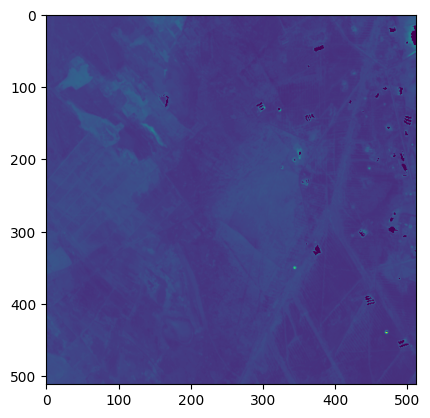

0


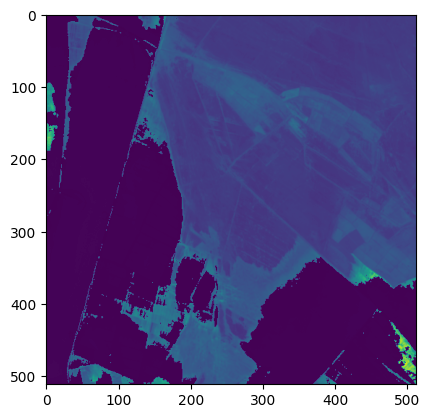

0


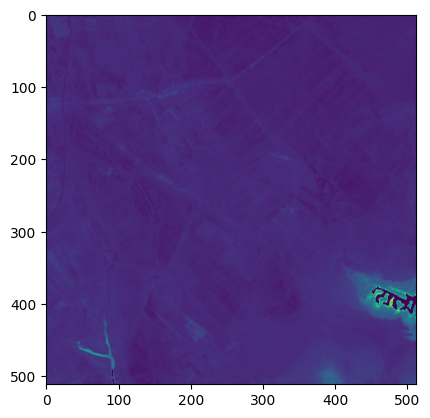

0


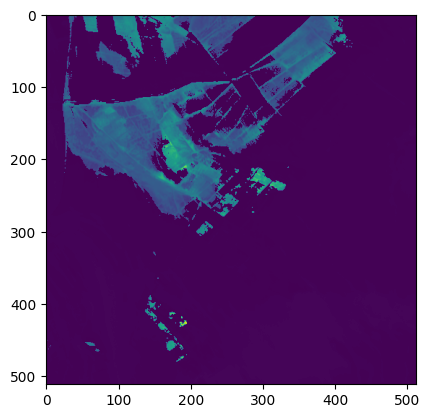

0


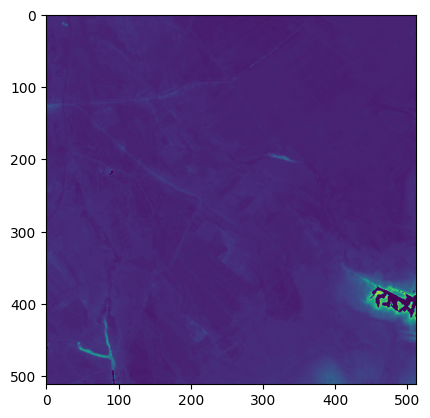

0


In [ ]:
for i in range(90, 95):
  plt.imshow(images[i])
  plt.show()
  print(labels[i])

In [ ]:
images[0].shape

(512, 512)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1559, 512, 512)

In [ ]:
X_test.shape

(390, 512, 512)

In [ ]:
y_train.shape

(1559,)

In [ ]:
y_test.shape

(390,)

In [ ]:
np.random.seed(42)

import tensorflow as tf

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(512, 512, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 255, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 62, 62, 128)      0

In [ ]:
history = model.fit(X_train, y_train, batch_size=20, epochs=10, validation_split = 0.2)

Epoch 1/10
63/63 [==============================] - 25s 187ms/step - loss: 14.0642 - accuracy: 0.7065 - val_loss: 0.6597 - val_accuracy: 0.7532
Epoch 2/10
63/63 [==============================] - 9s 148ms/step - loss: 0.5388 - accuracy: 0.7915 - val_loss: 0.6854 - val_accuracy: 0.7564
Epoch 3/10
63/63 [==============================] - 9s 147ms/step - loss: 0.3862 - accuracy: 0.8540 - val_loss: 0.7681 - val_accuracy: 0.7949
Epoch 4/10
63/63 [==============================] - 9s 148ms/step - loss: 0.3312 - accuracy: 0.9166 - val_loss: 0.9647 - val_accuracy: 0.7788
Epoch 5/10
63/63 [==============================] - 9s 150ms/step - loss: 0.2087 - accuracy: 0.9471 - val_loss: 1.7067 - val_accuracy: 0.7853
Epoch 6/10
63/63 [==============================] - 10s 153ms/step - loss: 0.1068 - accuracy: 0.9687 - val_loss: 1.6443 - val_accuracy: 0.7885
Epoch 7/10
63/63 [==============================] - 9s 150ms/step - loss: 0.1517 - accuracy: 0.9687 - val_loss: 2.9179 - val_accuracy: 0.7724
Epo

In [ ]:
#/content/sample_data

model.save("classification_model")

In [ ]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

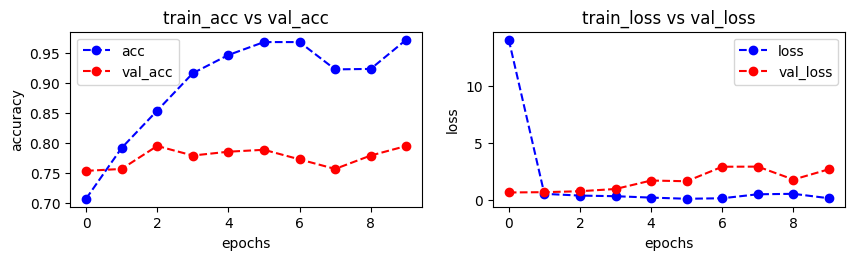

In [ ]:
plot_accuracy_loss(history)

In [ ]:
y_pred = model.predict(X_test)

13/13 [==============================] - 1s 73ms/step


In [ ]:
y_pred = np.squeeze(y_pred)
y_pred.shape

(390,)

In [ ]:
y_pred_binary = np.where(y_pred > 0.5, 1, 0)

In [ ]:
unique_values, counts = np.unique(y_pred_binary, return_counts=True)

# print the results
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1]
Counts: [315  75]


In [ ]:
y_test.shape

(390,)

In [ ]:
unique_values, counts = np.unique(y_test, return_counts=True)

# print the results
print("Unique values:", unique_values)
print("Counts:", counts)

Unique values: [0 1]
Counts: [299  91]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# assuming y_true and y_pred are your ground truth and predicted labels respectively
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.4666666666666667
Recall: 0.38461538461538464
F1 Score: 0.4216867469879518


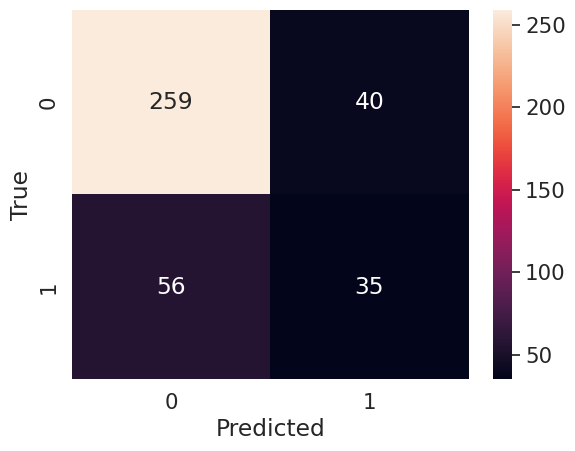

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# assuming y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Autoencoder**

In [ ]:
flist = []
rootdir = '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist.append(d)
        
        
print(f"The number of folders are currently = {len(flist)}")

The number of folders are currently = 1949


In [ ]:
img, l = load_data(flist[90:95])

Processing sen12floods_s2_source_0234_2019_03_22 image product
Processing sen12floods_s2_source_0235_2019_03_12 image product
Processing sen12floods_s2_source_0234_2019_04_21 image product
Processing sen12floods_s2_source_0235_2019_03_09 image product
Processing sen12floods_s2_source_0234_2019_03_19 image product


In [ ]:
img.shape

(5, 512, 512)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

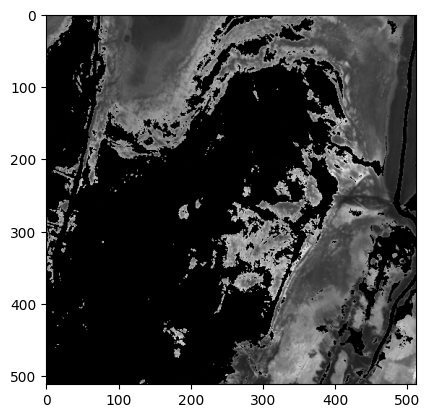

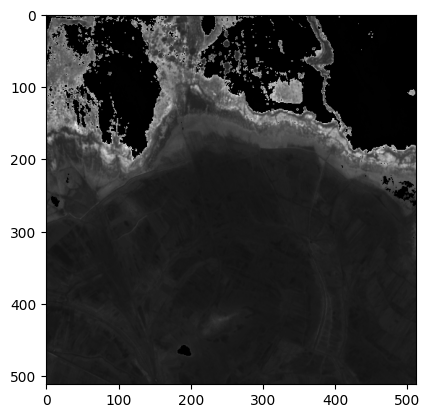

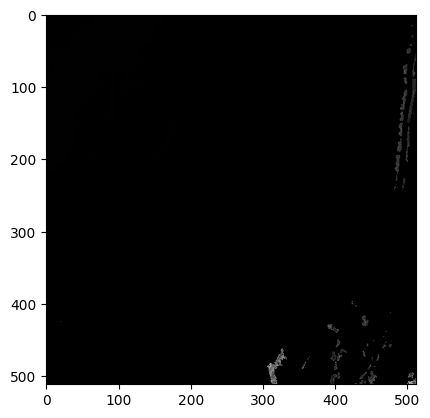

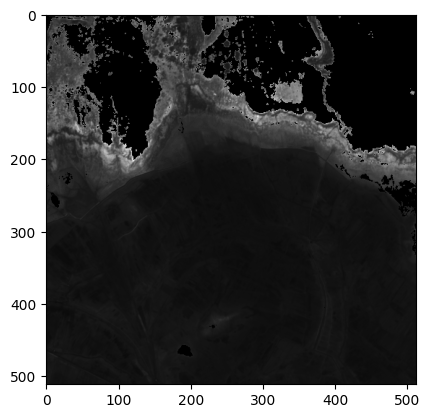

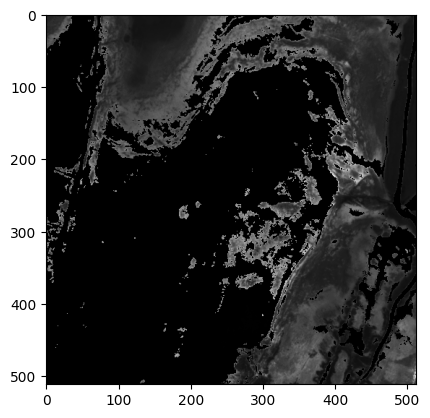

In [ ]:
for i in range(img.shape[0]):
  plt.imshow(img[i], cmap='gray')
  plt.show()

In [ ]:
img = np.expand_dims(img, axis=-1)

In [ ]:
img.shape

(5, 512, 512, 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose

# Encoder Layers
encoder_input = tf.keras.Input(shape=(512, 512, 1))
encoder_conv1 = Conv2D(32, (3,3), activation='relu', padding='same')(encoder_input)
encoder_pool1 = MaxPooling2D((2,2))(encoder_conv1)
encoder_conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(encoder_pool1)
encoder_pool2 = MaxPooling2D((2,2))(encoder_conv2)
encoder_conv3 = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_pool2)
encoder_pool3 = MaxPooling2D((2,2))(encoder_conv3)

# Decoder Layers
decoder_conv1 = Conv2DTranspose(128, (3,3), strides=(2,2), activation='relu', padding='same')(encoder_pool3)
decoder_conv2 = Conv2DTranspose(64, (3,3), strides=(2,2), activation='relu', padding='same')(decoder_conv1)
decoder_conv3 = Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same')(decoder_conv2)
decoder_output = Conv2D(1, (3,3), activation='sigmoid', padding='same')(decoder_conv3)

# Autoencoder Model
autoencoder = tf.keras.Model(encoder_input, decoder_output)

# Compile the Model
autoencoder.compile(optimizer='adam', loss='mse')

# Print the Model Summary
autoencoder.summary()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 512, 512, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 256, 256, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 128, 128, 128)     7385

In [ ]:
autoencoder.fit(img, img, epochs=1)

1/1 [==============================] - 3s 3s/step - loss: 980.0892


In [ ]:
# for i in range(img.shape[0]):
decoded = autoencoder.predict(img)
print(decoded.shape)

1/1 [==============================] - 0s 184ms/step
(5, 512, 512, 1)


0


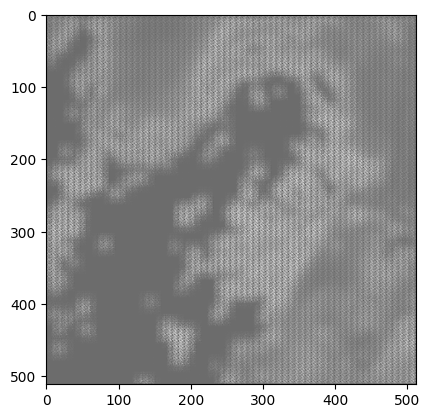

0


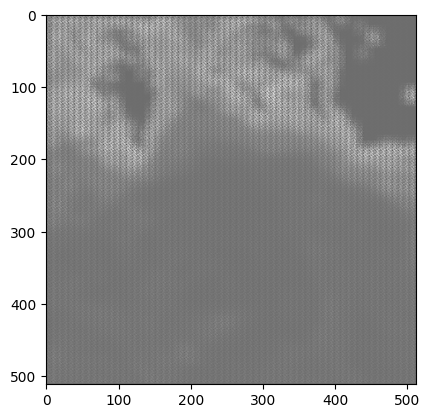

0


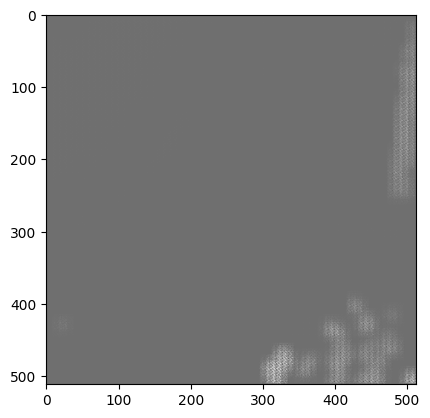

0


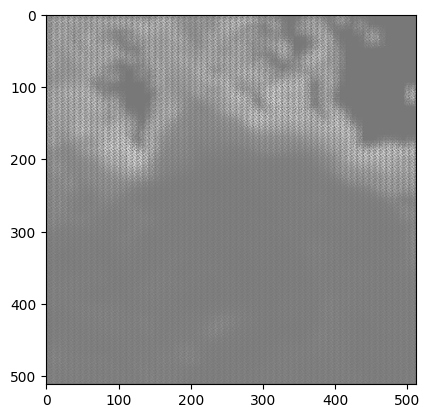

0


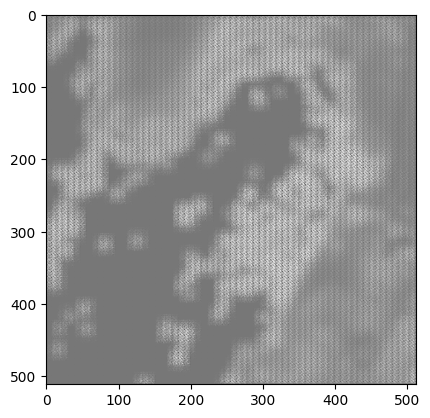

In [ ]:
for i in range(decoded.shape[0]):
  compressed = np.squeeze(decoded[i], axis=-1)
  print(l[i])
  plt.imshow(compressed, cmap='gray')
  plt.show()

In [ ]:
flist = []
rootdir = '/content/drive/MyDrive/SEN_Data/sen12floods_s2_source/sen12floods_s2_source'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        flist.append(d)
        
        
print(f"The number of folders are currently = {len(flist)}")

The number of folders are currently = 1949


In [ ]:
X, y = load_data(flist)

Processing sen12floods_s2_source_0220_2019_04_04 image product
Processing sen12floods_s2_source_0220_2019_02_23 image product
Processing sen12floods_s2_source_0220_2019_04_24 image product
Processing sen12floods_s2_source_0220_2019_03_25 image product
Processing sen12floods_s2_source_0220_2019_02_13 image product
Processing sen12floods_s2_source_0221_2019_02_23 image product
Processing sen12floods_s2_source_0222_2019_02_13 image product
Processing sen12floods_s2_source_0221_2019_04_04 image product
Processing sen12floods_s2_source_0222_2019_04_04 image product
Processing sen12floods_s2_source_0222_2019_03_25 image product
Processing sen12floods_s2_source_0222_2019_02_28 image product
Processing sen12floods_s2_source_0222_2019_04_19 image product
Processing sen12floods_s2_source_0223_2019_03_12 image product
Processing sen12floods_s2_source_0222_2019_02_23 image product
Processing sen12floods_s2_source_0222_2019_04_24 image product
Processing sen12floods_s2_source_0223_2019_04_21 image 

In [ ]:
X = np.expand_dims(X, axis=-1)
X.shape

(1949, 512, 512, 1)

In [ ]:
autoencoder.fit(X, X, epochs=10, batch_size=1)

Epoch 1/10
1949/1949 [==============================] - 47s 24ms/step - loss: 455.4348
Epoch 2/10
1949/1949 [==============================] - 46s 23ms/step - loss: 455.4062
Epoch 3/10
1949/1949 [==============================] - 46s 23ms/step - loss: 455.3993
Epoch 4/10
1949/1949 [==============================] - 45s 23ms/step - loss: 455.3980
Epoch 5/10
1949/1949 [==============================] - 45s 23ms/step - loss: 455.3972
Epoch 6/10
1949/1949 [==============================] - 45s 23ms/step - loss: 455.3965
Epoch 7/10
1949/1949 [==============================] - 45s 23ms/step - loss: 455.3977
Epoch 8/10
1949/1949 [==============================] - 46s 23ms/step - loss: 455.3969
Epoch 9/10
1949/1949 [==============================] - 46s 23ms/step - loss: 455.3952
Epoch 10/10
1949/1949 [==============================] - 46s 24ms/step - loss: 455.3953


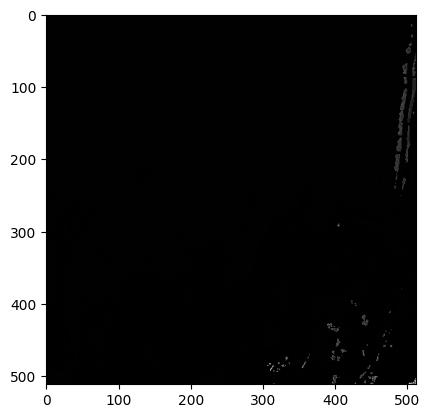

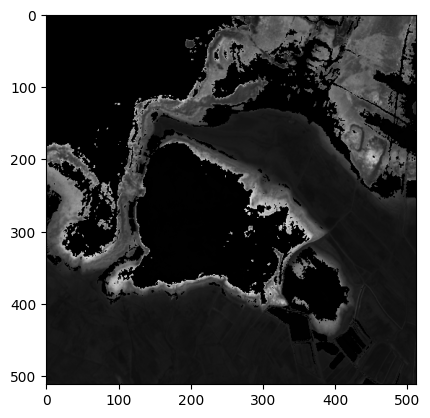

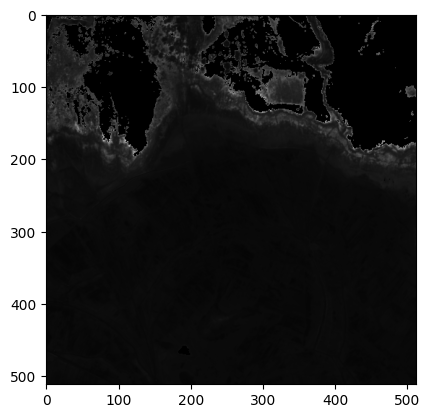

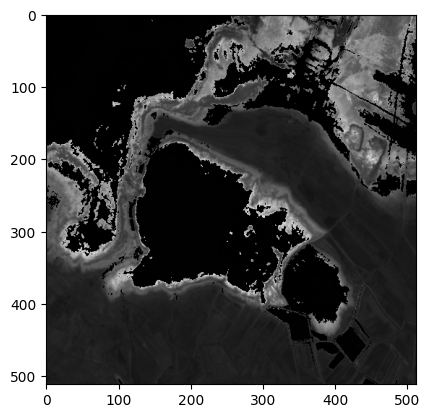

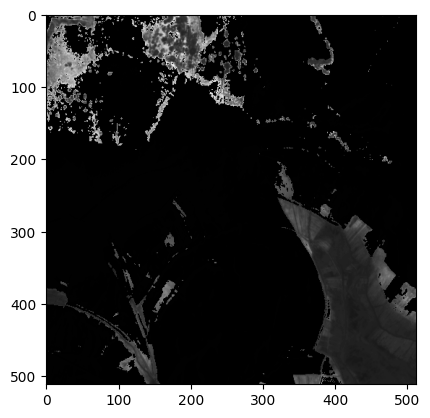

In [ ]:
X_test = X[95:100]

for i in range(X_test.shape[0]):
  plt.imshow(X_test[i], cmap='gray')
  plt.show()


In [ ]:
decoded = autoencoder.predict(X_test)
print(decoded.shape)

1/1 [==============================] - 0s 30ms/step
(5, 512, 512, 1)


0


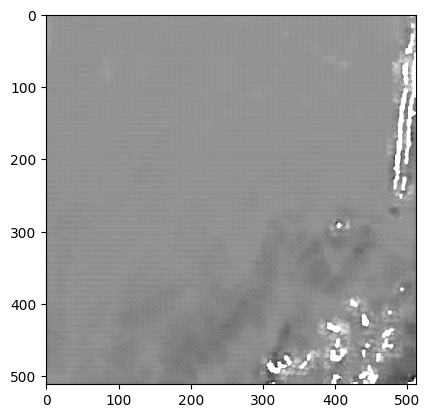

0


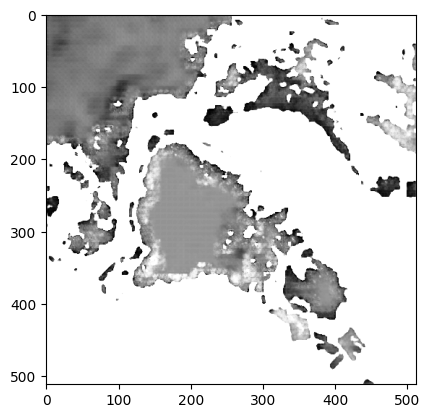

0


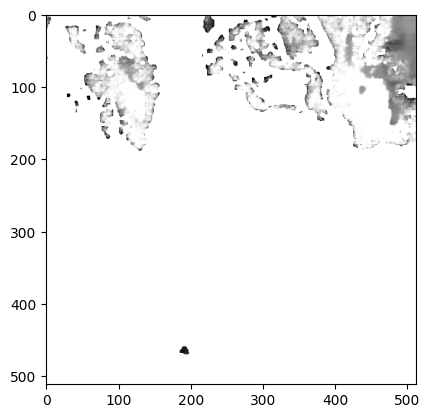

0


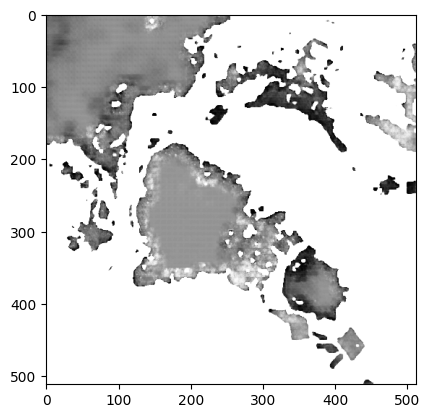

0


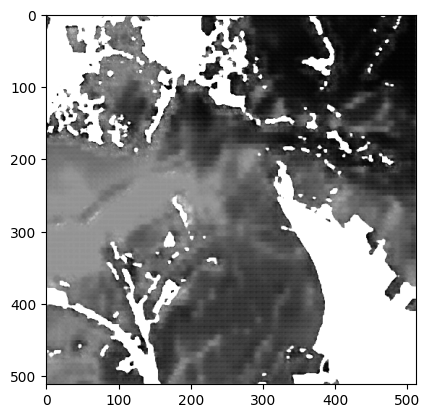

In [ ]:
for i in range(decoded.shape[0]):
  compressed = np.squeeze(decoded[i], axis=-1)
  print(l[i])
  plt.imshow(compressed, cmap='gray')
  plt.show()